In [1]:
from moduleTest import ModuleTest
import numpy as np
from ics.cobraCharmer import pfi as pfiControl
from ics.cobraCharmer import pfiDesign


import matplotlib.pyplot as plt

In [ ]:
broken=[1,55]
mt = ModuleTest('128.149.77.24', 
                '/home/pfs/mhs/devel/ics_cobraCharmer/xml/PFS-PFI-CIT900200-04_Science_15_FinalXML.xml', 
                brokens=broken,camSplit=28)
pfi = mt.pfi

In [ ]:
mt.convertXML('/home/pfs/mhs/devel/ics_cobraCharmer/xml/Science15_converted.xml')

# Make sure the conversion is correct

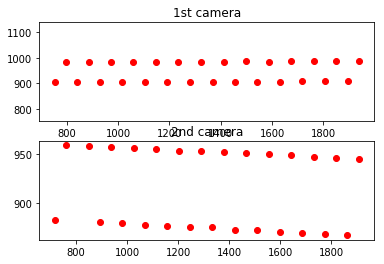

In [3]:
xml = '/home/pfs/mhs/devel/ics_cobraCharmer/xml/Science15_converted.xml'

model = pfiDesign.PFIDesign(xml)

brokens = [1,55]
visibles= [e for e in range(1,58) if e not in brokens]
badIdx = np.array(brokens) - 1
goodIdx = np.array(visibles) - 1

# two groups for two cameras
cam_split = 28
group1 = goodIdx[goodIdx <= cam_split]
group2 = goodIdx[goodIdx > cam_split]

plt.figure(1)
plt.clf()

plt.subplot(211)
ax = plt.gca()

ax.plot(model.centers[group1].real, model.centers[group1].imag, 'ro')
ax.axis('equal')
#for idx in group1:
#    c = plt.Circle((centers[idx].real, centers[idx].imag), radius[idx], color='g', fill=False)
#    ax.add_artist(c)
ax.set_title(f'1st camera')

plt.subplot(212)
ax = plt.gca()

ax.plot(model.centers[group2].real, model.centers[group2].imag, 'ro')
#ax.axis('equal')
#for idx in group2:
#    c = plt.Circle((centers[idx].real, centers[idx].imag), radius[idx], color='g', fill=False)
#    ax.add_artist(c)
ax.set_title(f'2nd camera')

plt.show()

In [ ]:
mt = ModuleTest('128.149.77.24', 
                '/home/pfs/mhs/devel/ics_cobraCharmer/xml/Science15_converted.xml', 
                brokens=broken,camSplit=28)
pfi = mt.pfi

In [ ]:
phiOntime = np.zeros(57)+0.04
thetaOntime = np.zeros(57)+0.07

In [ ]:
mt.makePhiMotorMap('science15_20190730_phi.xml', '/data/chyan/20190730/phi', 
                   phiOnTime=phiOntime, repeat = 1, fast=False)

In [ ]:
path = '/data/chyan/20190730/phi/'
centers = np.load(path + 'phiCenter.npy')
radius = np.load(path + 'phiRadius.npy')
fw = np.load(path + 'phiFW.npy')
rv = np.load(path + 'phiRV.npy')
af = np.load(path + 'phiAngFW.npy')
ar = np.load(path + 'phiAngRV.npy')
sf = np.load(path + 'phiSpeedFW.npy')
sr = np.load(path + 'phiSpeedRV.npy')
mf = np.load(path + 'phiMMFW.npy')
mr = np.load(path + 'phiMMRV.npy')
bad = np.load(path + 'bad.npy')
mf2 = np.load(path + 'phiMMFW2.npy')
mr2 = np.load(path + 'phiMMRV2.npy')
bad2 = np.load(path + 'bad2.npy')

In [ ]:
brokens = [1,55]
visibles= [e for e in range(1,58) if e not in brokens]
badIdx = np.array(brokens) - 1
goodIdx = np.array(visibles) - 1

# two groups for two cameras
cam_split = 28
group1 = goodIdx[goodIdx <= cam_split]
group2 = goodIdx[goodIdx > cam_split]

plt.figure(1)
plt.clf()

plt.subplot(211)
ax = plt.gca()

ax.plot(centers[group1].real, centers[group1].imag, 'ro')
ax.axis('equal')
for idx in group1:
    c = plt.Circle((centers[idx].real, centers[idx].imag), radius[idx], color='g', fill=False)
    ax.add_artist(c)
ax.set_title(f'1st camera')

plt.subplot(212)
ax = plt.gca()

ax.plot(centers[group2].real, centers[group2].imag, 'ro')
ax.axis('equal')
for idx in group2:
    c = plt.Circle((centers[idx].real, centers[idx].imag), radius[idx], color='g', fill=False)
    ax.add_artist(c)
ax.set_title(f'2nd camera')

plt.show()

# On-time optimization

In [ ]:
pfi.moveAllSteps(mt.allCobras, 0, -5000)

In [ ]:
phiPath = '/data/chyan/20190730/phi/'
xml = phiPath+'science15_20190730_phi.xml'


In [ ]:
model = pfiDesign.PFIDesign(xml)
sf = np.rad2deg(np.load(phiPath + 'phiSpeedFW.npy'))
sr = np.rad2deg(np.load(phiPath + 'phiSpeedRV.npy'))

In [ ]:
target_sf = np.zeros(57)+0.075
ontime = target_sf*model.motorOntimeSlowFwd2/sf

In [ ]:
ontime1 = ontime - 0.005
ontime2 = ontime + 0.005
ontime3 = ontime + 0.010
ontime4 = ontime + 0.015

In [ ]:
ontime4

In [ ]:
mt.makePhiMotorMap('science01_20190730_phi_run1.xml', '/data/chyan/20190730/phi-ontime/run1/', 
                   phiOnTime=ontime1, repeat = 3, fast=False,totalSteps = 7000)
mt.makePhiMotorMap('science01_20190730_phi_run2.xml', '/data/chyan/20190730/phi-ontime/run2/', 
                   phiOnTime=ontime2, repeat = 3, fast=False,totalSteps = 7000)
mt.makePhiMotorMap('science01_20190730_phi_run3.xml', '/data/chyan/20190730/phi-ontime/run3/', 
                   phiOnTime=ontime3, repeat = 3, fast=False,totalSteps = 7000)
mt.makePhiMotorMap('science01_20190730_phi_run4.xml', '/data/chyan/20190730/phi-ontime/run4/', 
                   phiOnTime=ontime4, repeat = 3, fast=False,totalSteps = 7000)

# Running phi motor map with best on-time

In [ ]:
broken=[1,55]
mt = ModuleTest('128.149.77.24', 
                '/home/pfs/mhs/devel/ics_cobraCharmer/xml/Science15_phiopt_20190731.xml', 
                brokens=broken,camSplit=28)
pfi = mt.pfi

In [ ]:
mt.makePhiMotorMap('science15_phi50step_20190731.xml', '/data/chyan/20190731/phi50Step/', 
                   repeat = 3, steps = 50, fast=False,totalSteps = 7000)

mt.makePhiMotorMap('science15_phi400step_20190731.xml', '/data/chyan/20190731/phi400Step/', 
                   repeat = 3, steps = 400, fast=False,totalSteps = 7000)

mt.makePhiMotorMap('science15_phi50stepFast_20190731.xml', '/data/chyan/20190731/phi50StepFast/', 
                   repeat = 3, steps = 50, fast=True,totalSteps = 7000)

mt.makePhiMotorMap('science15_phi400step_20190731.xml', '/data/chyan/20190731/phi400StepFast/', 
                   repeat = 3, steps = 400, fast=True,totalSteps = 7000)


# Convergence Test

In [ ]:
broken=[1,55]
mt = ModuleTest('128.149.77.24', 
                '/data/chyan/20190731/phi50Step/science15_phi50step_20190731.xml', 
                brokens=broken,camSplit=28)
pfi = mt.pfi

In [ ]:
dataPath = '/data/chyan/20190801/phiConvergeTest/'
mt.phiConvergenceTest(dataPath, margin=15.0, runs=50, tries=8, fast=False)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from bokeh.io import output_notebook, show, export_png,export_svgs, save
from bokeh.plotting import figure, show, output_file
import bokeh.palettes
from bokeh.layouts import column,gridplot
from bokeh.models import HoverTool, ColumnDataSource, LinearColorMapper
from bokeh.models.glyphs import Text
from bokeh.palettes import Category20
from bokeh.palettes import inferno

output_notebook()

In [ ]:
phiData = np.load('/data/chyan/20190801/phiConvergeTest/phiData.npy')
brokens = []
badIdx = np.array(brokens) - 1
goodIdx = np.array([e for e in range(57) if e not in badIdx])

x = np.arange(9)

In [ ]:
phiData.shape

In [ ]:
runs=50
margin = 15
output_file("spare15_phi_convergence.html")

def plotPhiConvergence(phiData, runs, fiberNo):
    TOOLS = ['pan','box_zoom','wheel_zoom', 'save' ,'reset','hover']

    title_string=f"Fiber {fiberNo+1} Phi"
    p = figure( tools=TOOLS, x_range=[0,9], y_range=[-20,180],
               plot_height=400, plot_width=500,title=title_string)
    p.xaxis.axis_label = 'Iteration Number'
    p.yaxis.axis_label = 'Angle Difference from Phi Target'

    #mapper = Category40[runs]
    mapper = inferno(runs)

    for i in range(runs):
        angle = margin + (180 - 2 * margin) * i / (runs - 1)
        ydata= angle - np.rad2deg(np.append([0], phiData[fiberNo,i,:,0]))
        p.circle(x=x, y=ydata,radius=0.08,color=mapper[-i])
        p.line(x=x, y=ydata,line_width=2,color=mapper[-i])
    return p

parray=[]

for fiberNo in goodIdx:
    p=plotPhiConvergence(phiData, runs, fiberNo)
    parray.append(p)

grid = gridplot(parray, ncols=4, plot_width=250, plot_height=250)
show(grid)

# Theta ROM test

In [ ]:
broken=[1,55]
mt = ModuleTest('128.149.77.24', 
                '/data/chyan/20190731/phi50Step/science15_phi50step_20190731.xml', 
                brokens=broken,camSplit=28)
pfi = mt.pfi

In [ ]:
thetaOntime = np.zeros(57)+0.06

In [ ]:
mt.makeThetaMotorMap('science15_20190801_theta.xml', '/data/chyan/20190801/theta', 
                   thetaOnTime=thetaOntime, repeat = 1, fast=False, totalSteps = 12000)

In [ ]:
thetaPath = '/data/chyan/20190801/theta/'
xml = thetaPath+'science15_20190801_theta.xml'

model = pfiDesign.PFIDesign(xml)
sf = np.rad2deg(np.load(thetaPath + 'thetaSpeedFW.npy'))
sr = np.rad2deg(np.load(thetaPath + 'thetaSpeedRV.npy'))

In [ ]:
target_sf = np.zeros(57)+0.05
ontime = target_sf*model.motorOntimeSlowFwd1/sf

In [ ]:
ontime1 = ontime - 0.010
ontime2 = ontime - 0.005
ontime3 = ontime + 0.005
ontime4 = ontime + 0.010

In [ ]:
ontime - 0.01

In [ ]:
mt.makeThetaMotorMap('science01_20190701_theta_run1.xml', '/data/chyan/20190801/theta-ontime/run1/', 
                   thetaOnTime=ontime1, repeat = 3, fast=False,totalSteps = 12000, limitOnTime = 0.08)
mt.makeThetaMotorMap('science01_20190701_theta_run2.xml', '/data/chyan/20190801/theta-ontime/run2/', 
                   thetaOnTime=ontime2, repeat = 3, fast=False,totalSteps = 12000, limitOnTime = 0.08)
mt.makeThetaMotorMap('science01_20190701_theta_run3.xml', '/data/chyan/20190801/theta-ontime/run3/', 
                   thetaOnTime=ontime3, repeat = 3, fast=False,totalSteps = 12000, limitOnTime = 0.08)
mt.makeThetaMotorMap('science01_20190701_theta_run4.xml', '/data/chyan/20190801/theta-ontime/run4/', 
                   thetaOnTime=ontime4, repeat = 3, fast=False,totalSteps = 12000, limitOnTime = 0.08)



# Fine tune ot-time

In [4]:
path = '/data/chyan/20190802/theta50Step/'

xml=path+'science15_theta50step_20190802.xml'
newXML=path+'science15_theta50step_20190822.xml'

model = pfiDesign.PFIDesign(xml)

centers = np.load(path + 'thetaCenter.npy')
radius = np.load(path + 'thetaRadius.npy')
fw = np.load(path + 'thetaFW.npy')
rv = np.load(path + 'thetaRV.npy')
af = np.load(path + 'thetaAngFW.npy')
ar = np.load(path + 'thetaAngRV.npy')
sf = np.load(path + 'thetaSpeedFW.npy')
sr = np.load(path + 'thetaSpeedRV.npy')
badR = np.load(path + 'badRange.npy')
mf = np.load(path + 'thetaMMFW.npy')
mr = np.load(path + 'thetaMMRV.npy')
bad = np.load(path + 'bad.npy')
mf2 = np.load(path + 'thetaMMFW2.npy')
mr2 = np.load(path + 'thetaMMRV2.npy')
bad2 = np.load(path + 'bad2.npy')

otsf1=model.motorOntimeSlowFwd1
otsr1=model.motorOntimeSlowRev1
otf1=model.motorOntimeFwd1
otr1=model.motorOntimeRev1

for n in range(1):
    for i in goodIdx:
        daf = (af[i,n,-1]-af[i,n,0])*180/3.14159
        dar = (ar[i,n,-1]-ar[i,n,0])*180/3.14159
        if (daf < 360) or (dar>-360):
            print(i+1,daf,dar)
        if (daf < 360):
            otsf1 = otsf1+0.005
        if (dar > -360):
            otsr1 = otsr1+0.005

model.updateOntimes(thtFwd=otsf1, thtRev=otsr1, fast=False)
model.createCalibrationFile(newXML)  

18 31.641134622931666 -355.0864029102304
19 316.79840679451354 -375.62465676013284
21 379.23879505088706 -302.85388885957684
24 374.4711750653033 -292.48512419000804
30 179.37217456011587 -143.94545305276438
38 380.3055752321766 -355.57646032661467
47 375.93468695836253 -259.94061356712047
54 324.1148680349781 -381.796911615393
57 202.5393902674701 -250.44981147992894


In [5]:
broken=[1,55]
mt = ModuleTest('128.149.77.24', 
                path+'science15_theta50step_20190822.xml', 
                brokens=broken,camSplit=28)
pfi = mt.pfi

2019-08-22T16:33:10.062 20 fpgaIO     FPGA connection to 128.149.77.24
2019-08-22T16:33:10.090 20 fpga       load cobra model from /data/chyan/20190802/theta50Step/science15_theta50step_20190822.xml
2019-08-22T16:33:10.091 20 log.short  --- ISSUE SETFREQ & VERIFY (brd:1) ---
2019-08-22T16:33:10.092 20 log.eth    (ETH)Sent msg on socket.
(0300003907d08fde	081300fc00980823	00fe0094101300fc	0095102300fb0094	
181300f900961823	00f80096201300fc	0099202301010096	281300fe00952823	
00fd0094301300fb	009a302300fd0093	381300fd00953823	00fc0095401300fe	
0095402300fe0095	4813010100974823	00fc009450130100	0093502300ff0096	
581300fe00955823	01010097601300fe	0095602300fb0094	681300fc00946823	
01000094701300fb	0095702300fe0097	781300fe00947823	00fd0095801300ff	
0094802300fd0096	881300fd00948823	00fc0095901300fe	0097902300ff0093	
981300fd00969823	00ff0095a01300fd	0098a02301000096	a81300f90096a823	
01000096b01300fc	0093b02301000097	b81301000096b823	01010092c01300ff	
0096c02300ff0098	c81300ff0096c823	01000

IS_COLORMODE_MONOCHROME: 
	m_nColorMode: 		 34
	nBitsPerPixel: 		 10
	bytes_per_pixel: 		 2

Camera model:		 UI318xCP-M
Camera serial no.:	 4103149829
Maximum image self.width:	 2592
Maximum image self.height:	 2048

200
IS_COLORMODE_MONOCHROME: 
	m_nColorMode: 		 34
	nBitsPerPixel: 		 10
	bytes_per_pixel: 		 2

Camera model:		 UI318xCP-M
Camera serial no.:	 4103118685
Maximum image self.width:	 2592
Maximum image self.height:	 2048

200


In [6]:
pfi.moveAllSteps(mt.allCobras, -10000, 0)
pfi.moveAllSteps(mt.allCobras, -2000, 0)

2019-08-22T16:34:02.647 20 log.short  --- ISSUE RUN & VERIFY (1) ---
2019-08-22T16:34:02.648 20 log.full   (C1,1 (36, 25)uS x(10000, 0) d(0, 0) ['ccw', 'cw']) (C2,1 (80, 37)uS x(10000, 0) d(0, 0) ['ccw', 'cw']) (C1,2 (80, 32)uS x(10000, 0) d(0, 0) ['ccw', 'cw']) 
(C2,2 (80, 38)uS x(10000, 0) d(0, 0) ['ccw', 'cw']) (C1,3 (80, 37)uS x(10000, 0) d(0, 0) ['ccw', 'cw']) (C2,3 (80, 40)uS x(10000, 0) d(0, 0) ['ccw', 'cw']) 
(C1,4 (80, 57)uS x(10000, 0) d(0, 0) ['ccw', 'cw']) (C2,4 (80, 41)uS x(10000, 0) d(0, 0) ['ccw', 'cw']) (C1,5 (80, 53)uS x(10000, 0) d(0, 0) ['ccw', 'cw']) 
(C2,5 (80, 37)uS x(10000, 0) d(0, 0) ['ccw', 'cw']) (C1,6 (75, 25)uS x(10000, 0) d(0, 0) ['ccw', 'cw']) (C2,6 (80, 27)uS x(10000, 0) d(0, 0) ['ccw', 'cw']) 
(C1,7 (61, 36)uS x(10000, 0) d(0, 0) ['ccw', 'cw']) (C2,7 (80, 40)uS x(10000, 0) d(0, 0) ['ccw', 'cw']) (C1,8 (69, 36)uS x(10000, 0) d(0, 0) ['ccw', 'cw']) 
(C2,8 (80, 29)uS x(10000, 0) d(0, 0) ['ccw', 'cw']) (C1,9 (80, 40)uS x(10000, 0) d(0, 0) ['ccw', 'cw']) (C2,

2019-08-22T16:34:27.699 20 log.medium Timeout:65535, inter:156
2019-08-22T16:34:27.704 20 log.eth    (ETH)Sent msg on socket.
(01000039ffff009c	92b40815002407d0	0000001900000000	0825005007d00000	
0025000000001015	005007d000000020	0000000010250050	07d0000000260000	
00001815005007d0	0000002500000000	1825005007d00000	0028000000002015	
005007d000000039	0000000020250050	07d0000000290000	00002815005007d0	
0000003500000000	2825005007d00000	0025000000003015	004b07d000000019	
0000000030250050	07d00000001b0000	00003815003d07d0	0000002400000000	
3825005007d00000	0028000000004015	004507d000000024	0000000040250050	
07d00000001d0000	00004815005007d0	0000002800000000	4825005007d00000	
0020000000005015	004107d000000026	0000000050250050	07d0000000290000	
00005815004b07d0	0000001f00000000	5825005007d00000	0026000000006015	
005007d00000001e	0000000060250050	07d0000000380000	00006815005007d0	
0000001b00000000	6825005007d00000	0033000000007015	005007d000000020	
0000000070250050	07d0000000260000	00007815005

In [ ]:
mt.makeThetaMotorMap('science15_theta_20190822.xml', '/data/chyan/20190822/theta-ot-op/', 
                   repeat = 1, steps = 200, fast=False,totalSteps = 12000)


Camera close!
IS_COLORMODE_MONOCHROME: 
	m_nColorMode: 		 34
	nBitsPerPixel: 		 10
	bytes_per_pixel: 		 2

Camera model:		 UI318xCP-M
Camera serial no.:	 4103149829
Maximum image self.width:	 2592
Maximum image self.height:	 2048

200
Camera close!


2019-08-22T16:34:44.075 20 log.short  --- ISSUE RUN & VERIFY (2) ---
2019-08-22T16:34:44.076 20 log.full   (C2,1 (60, 60)uS x(10000, 0) d(0, 0) ['ccw', 'cw']) (C1,2 (60, 60)uS x(10000, 0) d(0, 0) ['ccw', 'cw']) (C2,2 (60, 60)uS x(10000, 0) d(0, 0) ['ccw', 'cw']) 
(C1,3 (60, 60)uS x(10000, 0) d(0, 0) ['ccw', 'cw']) (C2,3 (60, 60)uS x(10000, 0) d(0, 0) ['ccw', 'cw']) (C1,4 (60, 60)uS x(10000, 0) d(0, 0) ['ccw', 'cw']) 
(C2,4 (60, 60)uS x(10000, 0) d(0, 0) ['ccw', 'cw']) (C1,5 (60, 60)uS x(10000, 0) d(0, 0) ['ccw', 'cw']) (C2,5 (60, 60)uS x(10000, 0) d(0, 0) ['ccw', 'cw']) 
(C1,6 (60, 60)uS x(10000, 0) d(0, 0) ['ccw', 'cw']) (C2,6 (60, 60)uS x(10000, 0) d(0, 0) ['ccw', 'cw']) (C1,7 (60, 60)uS x(10000, 0) d(0, 0) ['ccw', 'cw']) 
(C2,7 (60, 60)uS x(10000, 0) d(0, 0) ['ccw', 'cw']) (C1,8 (60, 60)uS x(10000, 0) d(0, 0) ['ccw', 'cw']) (C2,8 (60, 60)uS x(10000, 0) d(0, 0) ['ccw', 'cw']) 
(C1,9 (60, 60)uS x(10000, 0) d(0, 0) ['ccw', 'cw']) (C2,9 (60, 60)uS x(10000, 0) d(0, 0) ['ccw', 'cw']) (C1,

IS_COLORMODE_MONOCHROME: 
	m_nColorMode: 		 34
	nBitsPerPixel: 		 10
	bytes_per_pixel: 		 2

Camera model:		 UI318xCP-M
Camera serial no.:	 4103118685
Maximum image self.width:	 2592
Maximum image self.height:	 2048

200


# Running theta motor map

In [ ]:
broken=[1,55]
mt = ModuleTest('128.149.77.24', 
                '/data/chyan/20190731/phi50Step/Science15_thetaopt_20190802.xml', 
                brokens=broken,camSplit=28)
pfi = mt.pfi

In [ ]:
mt.makeThetaMotorMap('science15_theta50step_20190802.xml', '/data/chyan/20190802/theta50Step/', 
                   repeat = 3, steps = 50, fast=False,totalSteps = 12000)

mt.makeThetaMotorMap('science15_theta400step_20190802.xml', '/data/chyan/20190802/theta400Step/', 
                   repeat = 3, steps = 400, fast=False,totalSteps = 12000)

mt.makeThetaMotorMap('science15_theta50stepFast_20190802.xml', '/data/chyan/20190802/theta50StepFast/', 
                   repeat = 3, steps = 50, fast=True,totalSteps = 12000)

mt.makeThetaMotorMap('science15_theta400step_20190802.xml', '/data/chyan/20190802/theta400StepFast/', 
                   repeat = 3, steps = 400, fast=True,totalSteps = 12000)


# Theta Convergence Test

In [ ]:
broken=[1,55]
mt = ModuleTest('128.149.77.24', 
                '/data/chyan/20190802/theta50Step/science15_theta50step_20190802.xml', 
                brokens=broken,camSplit=28)
pfi = mt.pfi

In [ ]:
dataPath = '/data/chyan/20190821/thetaConvergeTest/'
mt.thetaConvergenceTest(dataPath, margin=15.0, runs=50, tries=8, fast=False)